Active cases after 7 days: 323,331
Recovered cases after 7 days: 642,837
Deceased cases after 7 days: 27,661


Total cases after 7 days: 993,829


Percentage of active cases after 7 days: 32.5%
Percentage of recovered cases after 7 days: 64.7%
Percentage of deceased cases after 7 days: 2.8%


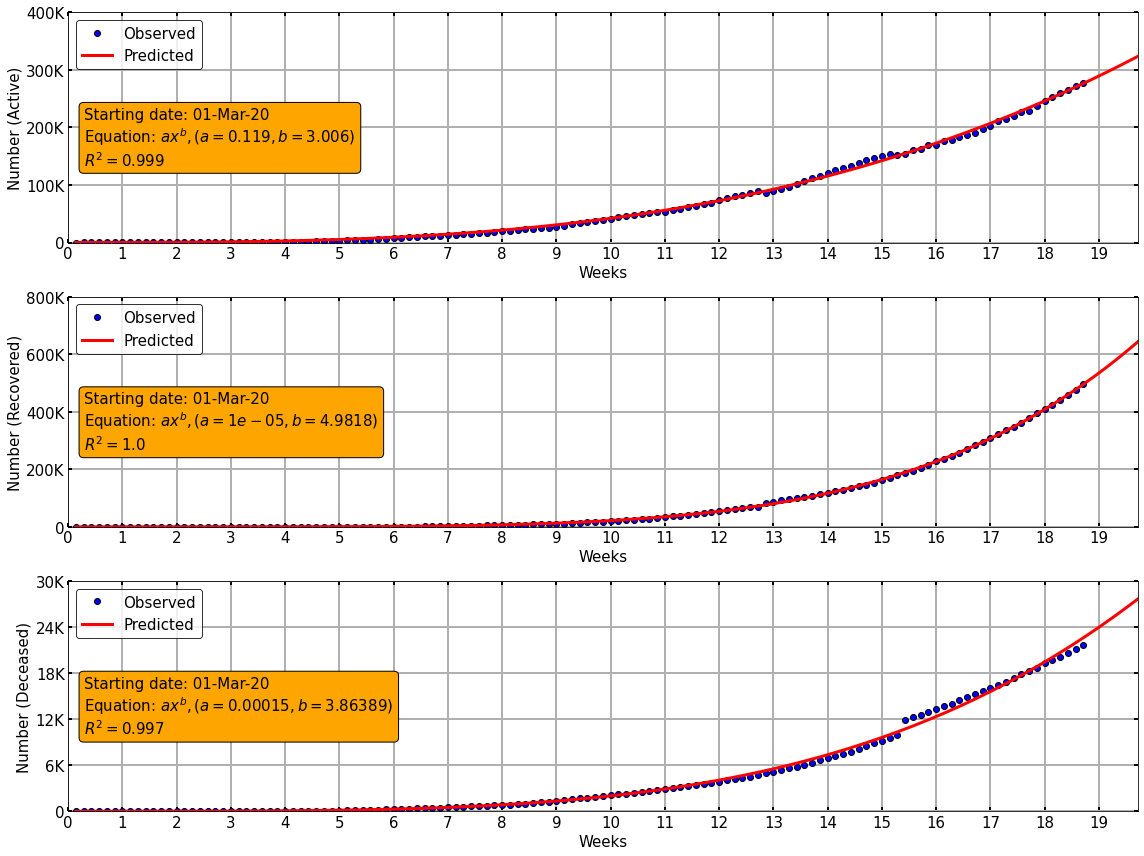

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_excel
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

%matplotlib inline


# model to be fitted with the data
def model_fit(input_x, a, b):
    
    output_y = a * np.power(input_x, b)  
    
    return output_y

# plot data
def multiple_line_plot(inp_a, sp_loc, line_c, line_leg, yax_label, ya_div, r2_val, pars_l):
    
    fig_sp = plt.subplot2grid(spg_t, sp_loc)  # subplot
    od_l = ncov_df.shape[0]  # ovserved data length
    sp_fsv = 15  # subplot fontsize value
    xa_div = 7  # x-axis divisor
    
    for v1 in np.arange(len(inp_a)):
        if line_leg[v1] == "Observed":
            fig_sp.plot(np.arange(1, od_l+1), inp_a[v1], 
                        marker="o", markersize=6, 
                        markeredgecolor="k", color=line_c[v1], linestyle="",  
                        label=line_leg[v1])  # plot observed data with marker
        else:
            fig_sp.plot(pday_a, inp_a[v1], color=line_c[v1], 
                        linestyle="-", linewidth=3, label=line_leg[v1])  # plot predicted data with line
    fig_sp.legend(loc="upper left", fancybox=True, fontsize=sp_fsv, edgecolor="k")  # plot legend
    fig_sp.set_xlabel("Weeks", fontsize=sp_fsv)  # x-axis label
    fig_sp.set_ylabel("Number "+yax_label, fontsize=sp_fsv)  # y-axis label
    fig_sp.set_xlim(0, od_l+eday_no)  # x-axis limit
    xt_a = np.arange(0, od_l+eday_no+1, xa_div)  # x-axis tick array
    fig_sp.set_xticks(xt_a)  # x-axis ticks
    fig_sp.set_xticklabels([int(v1/7) for v1 in xt_a], fontsize=sp_fsv)  # x-axis tick labels
    opa_max = np.amax([np.amax(v1) for v1 in inp_a])  # observed and predicted array maximum value
    quotient, remainder = opa_max // ya_div, opa_max % ya_div  # quotient and remainder of y-axis
    ya_ul = opa_max if remainder == 0 else (quotient+1) * ya_div  # y-axis upper limit
    fig_sp.set_ylim(0, ya_ul)  # y-axis limit
    yt_a = np.array(np.arange(0, ya_ul + 1, ya_div), dtype=int)  # y-axis tick array
    fig_sp.set_yticks(yt_a)  # y-axis ticks
    ytl_l = [str(int(v1/1000))+"K"  if v1 != 0 else v1 for v1 in yt_a]  # y-axis tick labels list
    fig_sp.set_yticklabels(ytl_l, fontsize=sp_fsv)  # y-axis tick labels
    fig_sp.xaxis.set_ticks_position("both")  # x-axis ticks in both sides
    fig_sp.yaxis.set_ticks_position("both")  # y-axis ticks in both sides
    fig_sp.grid(which="major", linewidth=2)  # major grid
    fig_sp.tick_params(which="major", direction="in", length=4, width=2)  # major ticks parameter
    figt_s = "Starting date: {} \nEquation: $ax^b, (a={},b={})$ \n$R^2={}$".format(s_date.strftime("%d-%b-%y"), 
                                                                                   pars_l[0], pars_l[1], r2_val)  # text string
    fig_sp.text(2, ya_ul/3, figt_s, fontsize=sp_fsv, ha="left", 
                bbox=dict(boxstyle="round", fc="Orange"))  # write text string in plot

    return fig_sp


ncov_df = read_excel("data_covid19.xlsx")[:]  # COVID-19 dataframe
s_date = ncov_df.iloc[0, ncov_df.columns.get_loc("Date")]  # starting date
day_a = np.arange(1, ncov_df.shape[0]+1)  # day array
eday_no = 7  # number of extended days
eday_a = day_a[-1] + np.arange(1, eday_no+1)  # extended day array
pday_a = np.append(day_a, eday_a)  # predicted day array

dcao_a = np.array(ncov_df["Total Active"])  # daily cumulative observed active array
dcro_a = np.array(ncov_df["Total Recovered"])  # daily cumulative observed recovered array
dcdo_a = np.array(ncov_df["Total Deceased"])  # daily cumulative observed deceased array

# active array fit 
a_pars, a_cov = curve_fit(model_fit, day_a, dcao_a)  # parameter estimation
ap_l = [round(v1, 3) for v1 in a_pars]  # parameter rounding list 
dcap_a = model_fit(pday_a, a_pars[0], a_pars[1])  # daily cumulative predicted array 
a_r2 = round((r2_score(dcao_a, dcap_a[:-eday_no])), 3)  #  R^2 value
print("Active cases after {} days: {:,}".format(eday_no, int(round(dcap_a[-1]))))

# recovered array fit 
r_pars, r_cov = curve_fit(model_fit, day_a, dcro_a)  # parameter estimation
rp_l = [round(v1, 5) for v1 in r_pars]  # parameter rounding list
dcrp_a = model_fit(pday_a, r_pars[0], r_pars[1])  # daily cumulative predicted array 
r_r2 = round((r2_score(dcro_a, dcrp_a[:-eday_no])), 3)  # R^2 value
print("Recovered cases after {} days: {:,}".format(eday_no, int(round(dcrp_a[-1]))))

# deceased array fit 
d_pars, d_cov = curve_fit(model_fit, day_a, dcdo_a)  # parameter estimation
dp_l = [round(v1, 5) for v1 in d_pars]  # parameter rounding list
dcdp_a = model_fit(pday_a, d_pars[0], d_pars[1])  # daily cumulative predicted array 
d_r2 = round((r2_score(dcdo_a, dcdp_a[:-eday_no])), 3)  # R^2 value
print("Deceased cases after {} days: {:,}".format(eday_no, int(round(dcdp_a[-1]))))

# plot figure
p_fig = plt.figure(num=1, figsize=(16, 12))  # size figure
spg_t = (3, 1)  # subplot grid tuple

# plot of daily cumulative and fitted active cases
dca_lg = multiple_line_plot([dcao_a, dcap_a], (0, 0), ["blue", "r"], 
                            ["Observed", "Predicted"], "(Active)", 100000, a_r2, ap_l) 

# plot of daily cumulative and fitted recovered cases
dcr_lg = multiple_line_plot([dcro_a, dcrp_a], (1, 0), ["blue", "r"], 
                            ["Observed", "Predicted"], "(Recovered)", 200000, r_r2, rp_l) 

# plot of daily cumulative and fitted recovered cases
dcd_lg = multiple_line_plot([dcdo_a, dcdp_a], (2, 0), ["blue", "r"], 
                            ["Observed", "Predicted"], "(Deceased)", 6000, d_r2, dp_l)

print("\n")
total_cases = dcap_a[-1]+dcrp_a[-1]+dcdp_a[-1]
print("Total cases after {} days: {:,}".format(eday_no, int(round(total_cases))))

print("\n")
print("Percentage of active cases after {} days: {:.1f}%".format(eday_no, 100*dcap_a[-1]/total_cases))
print("Percentage of recovered cases after {} days: {:.1f}%".format(eday_no, 100*dcrp_a[-1]/total_cases))
print("Percentage of deceased cases after {} days: {:.1f}%".format(eday_no, 100*dcdp_a[-1]/total_cases))


p_fig.tight_layout()  # tight layout of figure
p_fig.savefig("curve_fit_plot.png", bbox_inches="tight")  # save the figure

p_fig

plt.close("all")